<a href="https://colab.research.google.com/github/joe8606/Covid19_lookerstudio_project/blob/main/covid19_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("https://data.cdc.gov/api/views/8xkx-amqh/rows.csv?accessType=DOWNLOAD")


<ipython-input-2-6eb01cf898a2>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://data.cdc.gov/api/views/8xkx-amqh/rows.csv?accessType=DOWNLOAD")


In [ ]:
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

In [ ]:
# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962781 entries, 0 to 1962780
Data columns (total 80 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Date                                     object 
 1   FIPS                                     object 
 2   MMWR_week                                int64  
 3   Recip_County                             object 
 4   Recip_State                              object 
 5   Completeness_pct                         float64
 6   Administered_Dose1_Recip                 float64
 7   Administered_Dose1_Pop_Pct               float64
 8   Administered_Dose1_Recip_5Plus           float64
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64
 10  Administered_Dose1_Recip_12Plus          float64
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64
 12  Administered_Dose1_Recip_18Plus          float64
 13  Administered_Dose1_Recip_18PlusPop_Pct   float64
 14  Administered_Dose1

,0
Date,0
FIPS,0
MMWR_week,0
Recip_County,0
Recip_State,81
...,...
Bivalent_Booster_12Plus_Pop_Pct,1879451
Bivalent_Booster_18Plus,1877863
Bivalent_Booster_18Plus_Pop_Pct,1879451
Bivalent_Booster_65Plus,1877863


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")


In [ ]:
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

In [ ]:
selected_columns = [
    # 📌 Basic Information (Time & Geographic Data)
    "Date",
    "Recip_County",
    "Recip_State",
    "FIPS",
    "Census2019",

    # 📌 Primary Vaccination Stages (Vaccine Stage)
    "Administered_Dose1_Recip",
    "Administered_Dose1_Pop_Pct",
    "Series_Complete_Yes",
    "Series_Complete_Pop_Pct",
    "Booster_Doses",
    "Booster_Doses_Vax_Pct",
    "Bivalent_Booster_5Plus",
    "Bivalent_Booster_5Plus_Pop_Pct",

    # 📌 Vaccination by Age Group
    "Administered_Dose1_Recip_12Plus",
    "Administered_Dose1_Recip_12PlusPop_Pct",
    "Administered_Dose1_Recip_18Plus",
    "Administered_Dose1_Recip_18PlusPop_Pct",
    "Administered_Dose1_Recip_65Plus",
    "Administered_Dose1_Recip_65PlusPop_Pct",

    "Series_Complete_12Plus",
    "Series_Complete_12PlusPop_Pct",
    "Series_Complete_18Plus",
    "Series_Complete_18PlusPop_Pct",
    "Series_Complete_65Plus",
    "Series_Complete_65PlusPop_Pct",

    "Booster_Doses_12Plus",
    "Booster_Doses_12Plus_Vax_Pct",
    "Booster_Doses_18Plus",
    "Booster_Doses_18Plus_Vax_Pct",
    "Booster_Doses_65Plus",
    "Booster_Doses_65Plus_Vax_Pct",

    "Bivalent_Booster_12Plus",
    "Bivalent_Booster_12Plus_Pop_Pct",
    "Bivalent_Booster_18Plus",
    "Bivalent_Booster_18Plus_Pop_Pct",
    "Bivalent_Booster_65Plus",
    "Bivalent_Booster_65Plus_Pop_Pct"
]

# Filter the DataFrame to keep only the required columns
df_filtered = df[selected_columns]


In [ ]:
df_filtered

,Date,Recip_County,Recip_State,FIPS,Census2019,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Booster_Doses,...,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
1962780,2020-12-13,Houghton County,MI,26061,35684.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960636,2020-12-13,Colquitt County,GA,13071,45600.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960635,2020-12-13,Trinity County,CA,6105,12285.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960634,2020-12-13,Juneau County,WI,55057,26687.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960633,2020-12-13,McKean County,PA,42083,40625.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-05-10,Woodward County,OK,40153,20211.0,9159.0,45.3,7960.0,39.4,3467.0,...,3403.0,45.6,1724.0,67.0,1277.0,7.5,1258.0,8.2,781.0,23.6
2184,2023-05-10,Goochland County,VA,51075,23753.0,17667.0,74.4,16048.0,67.6,7082.0,...,6710.0,45.6,2857.0,58.4,3191.0,15.0,3105.0,15.8,1739.0,32.0
2183,2023-05-10,Caguas Municipio,PR,72025,124606.0,112847.0,90.6,105800.0,84.9,74144.0,...,67975.0,74.3,19379.0,82.0,14662.0,13.2,14328.0,14.0,7027.0,26.9
2193,2023-05-10,Oceana County,MI,26127,26467.0,NaN,NaN,14952.0,56.5,8717.0,...,8447.0,61.1,3956.0,79.6,2682.0,11.8,2617.0,12.7,1403.0,24.8


In [ ]:
df_earliest = df_filtered

,Date,Recip_County,Recip_State,FIPS,Census2019,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Booster_Doses,...,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
1962780,2020-12-13,Houghton County,MI,26061,35684.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960636,2020-12-13,Colquitt County,GA,13071,45600.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960635,2020-12-13,Trinity County,CA,6105,12285.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960634,2020-12-13,Juneau County,WI,55057,26687.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960633,2020-12-13,McKean County,PA,42083,40625.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-05-10,Woodward County,OK,40153,20211.0,9159.0,45.3,7960.0,39.4,3467.0,...,3403.0,45.6,1724.0,67.0,1277.0,7.5,1258.0,8.2,781.0,23.6
2184,2023-05-10,Goochland County,VA,51075,23753.0,17667.0,74.4,16048.0,67.6,7082.0,...,6710.0,45.6,2857.0,58.4,3191.0,15.0,3105.0,15.8,1739.0,32.0
2183,2023-05-10,Caguas Municipio,PR,72025,124606.0,112847.0,90.6,105800.0,84.9,74144.0,...,67975.0,74.3,19379.0,82.0,14662.0,13.2,14328.0,14.0,7027.0,26.9
2193,2023-05-10,Oceana County,MI,26127,26467.0,NaN,NaN,14952.0,56.5,8717.0,...,8447.0,61.1,3956.0,79.6,2682.0,11.8,2617.0,12.7,1403.0,24.8


In [ ]:
new_column_names = {
    # 📌 基本資訊（時間 & 地理資訊）
    "Date": "Date",
    "Recip_County": "County",
    "Recip_State": "State",
    "FIPS": "FIPS Code",
    "Census2019": "2019 Population",

    # # 📌 主要接種階段（Vaccine Stage）
    # "Administered_Dose1_Recip": "Vaccinated (1st Dose)",
    # "Administered_Dose1_Pop_Pct": "Vaccination Rate (1st Dose)",
    # "Series_Complete_Yes": "Fully Vaccinated",
    # "Series_Complete_Pop_Pct": "Vaccination Rate (Fully Vaccinated)",
    # "Booster_Doses": "Vaccinated (Booster 1st Dose)",
    # "Booster_Doses_Vax_Pct": "Vaccination Rate (Booster 1st Dose)",
    # "Bivalent_Booster_5Plus": "Vaccinated (Bivalent Booster)",
    # "Bivalent_Booster_5Plus_Pop_Pct": "Vaccination Rate (Bivalent Booster)",

    # # 📌 按年齡層的接種人數（Vaccinated by Age Group）
    # "Administered_Dose1_Recip_12Plus": "Vaccinated (12+)",
    # "Administered_Dose1_Recip_12PlusPop_Pct": "Vaccination Rate (12+)",
    # "Administered_Dose1_Recip_18Plus": "Vaccinated (18+)",
    # "Administered_Dose1_Recip_18PlusPop_Pct": "Vaccination Rate (18+)",
    # "Administered_Dose1_Recip_65Plus": "Vaccinated (65+)",
    # "Administered_Dose1_Recip_65PlusPop_Pct": "Vaccination Rate (65+)",

    # "Series_Complete_12Plus": "Fully Vaccinated (12+)",
    # "Series_Complete_12PlusPop_Pct": "Vaccination Rate (Fully Vaccinated, 12+)",
    # "Series_Complete_18Plus": "Fully Vaccinated (18+)",
    # "Series_Complete_18PlusPop_Pct": "Vaccination Rate (Fully Vaccinated, 18+)",
    # "Series_Complete_65Plus": "Fully Vaccinated (65+)",
    # "Series_Complete_65PlusPop_Pct": "Vaccination Rate (Fully Vaccinated, 65+)",

    # "Booster_Doses_12Plus": "Vaccinated (Booster 1st Dose, 12+)",
    # "Booster_Doses_12Plus_Vax_Pct": "Vaccination Rate (Booster 1st Dose, 12+)",
    # "Booster_Doses_18Plus": "Vaccinated (Booster 1st Dose, 18+)",
    # "Booster_Doses_18Plus_Vax_Pct": "Vaccination Rate (Booster 1st Dose, 18+)",
    # "Booster_Doses_65Plus": "Vaccinated (Booster 1st Dose, 65+)",
    # "Booster_Doses_65Plus_Vax_Pct": "Vaccination Rate (Booster 1st Dose, 65+)",

    # "Bivalent_Booster_12Plus": "Vaccinated (Bivalent Booster, 12+)",
    # "Bivalent_Booster_12Plus_Pop_Pct": "Vaccination Rate (Bivalent Booster, 12+)",
    # "Bivalent_Booster_18Plus": "Vaccinated (Bivalent Booster, 18+)",
    # "Bivalent_Booster_18Plus_Pop_Pct": "Vaccination Rate (Bivalent Booster, 18+)",
    # "Bivalent_Booster_65Plus": "Vaccinated (Bivalent Booster, 65+)",
    # "Bivalent_Booster_65Plus_Pop_Pct": "Vaccination Rate (Bivalent Booster, 65+)"
}

# 進行欄位名稱更改
df_earliest.rename(columns=new_column_names, inplace=True)


<ipython-input-14-e87e35812ee0>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earliest.rename(columns=new_column_names, inplace=True)


In [ ]:
# Calculate the missing value proportion for each County & State
missing_distribution = df_earliest.groupby(["County", "State"]).apply(lambda x: x.isnull().sum())
missing_ratio = missing_distribution.div(df_earliest.groupby(["County", "State"]).size(), axis=0)

# Compute the average missing ratio across all columns
average_missing_ratio = missing_ratio.mean(axis=1)  # Average missing proportion for each County & State

# Define bin ranges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Binning ranges for missing proportions
labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0"]

# Categorize missing proportions into bins
missing_ratio_categories = pd.cut(average_missing_ratio, bins=bins, labels=labels, include_lowest=True)

# Count the number of Counties in each category
county_count_by_category = missing_ratio_categories.value_counts().sort_index()

# Display the result
print(county_count_by_category)


<ipython-input-29-28e168be6f8f>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_distribution = df_earliest.groupby(["County", "State"]).apply(lambda x: x.isnull().sum())


0-0.2      3112
0.2-0.4      96
0.4-0.6      67
0.6-0.8       9
0.8-1.0       0
Name: count, dtype: int64


🔍 Overview of missing values:
Date                                0
County                              0
State                              79
FIPS Code                           0
2019 Population                 17035
Vaccinated (1st Dose)           23030
Vaccination Rate (1st Dose)     17071
Vaccinated (5+)                251752
Vaccination Rate (5+)          245082
Vaccinated (12+)                43491
Vaccination Rate (12+)          25510
Vaccinated (18+)                38286
Vaccination Rate (18+)          20274
Vaccinated (65+)                38197
Vaccination Rate (65+)          20185
dtype: int64

🔍 Number of missing values for each County & State:
                        Vaccinated (1st Dose)  Vaccination Rate (1st Dose)  \
County           State                                                       
Abbeville County SC                         0                            0   
Acadia Parish    LA                         0                            0   
Accomack County  VA   

<Figure size 1200x600 with 0 Axes>

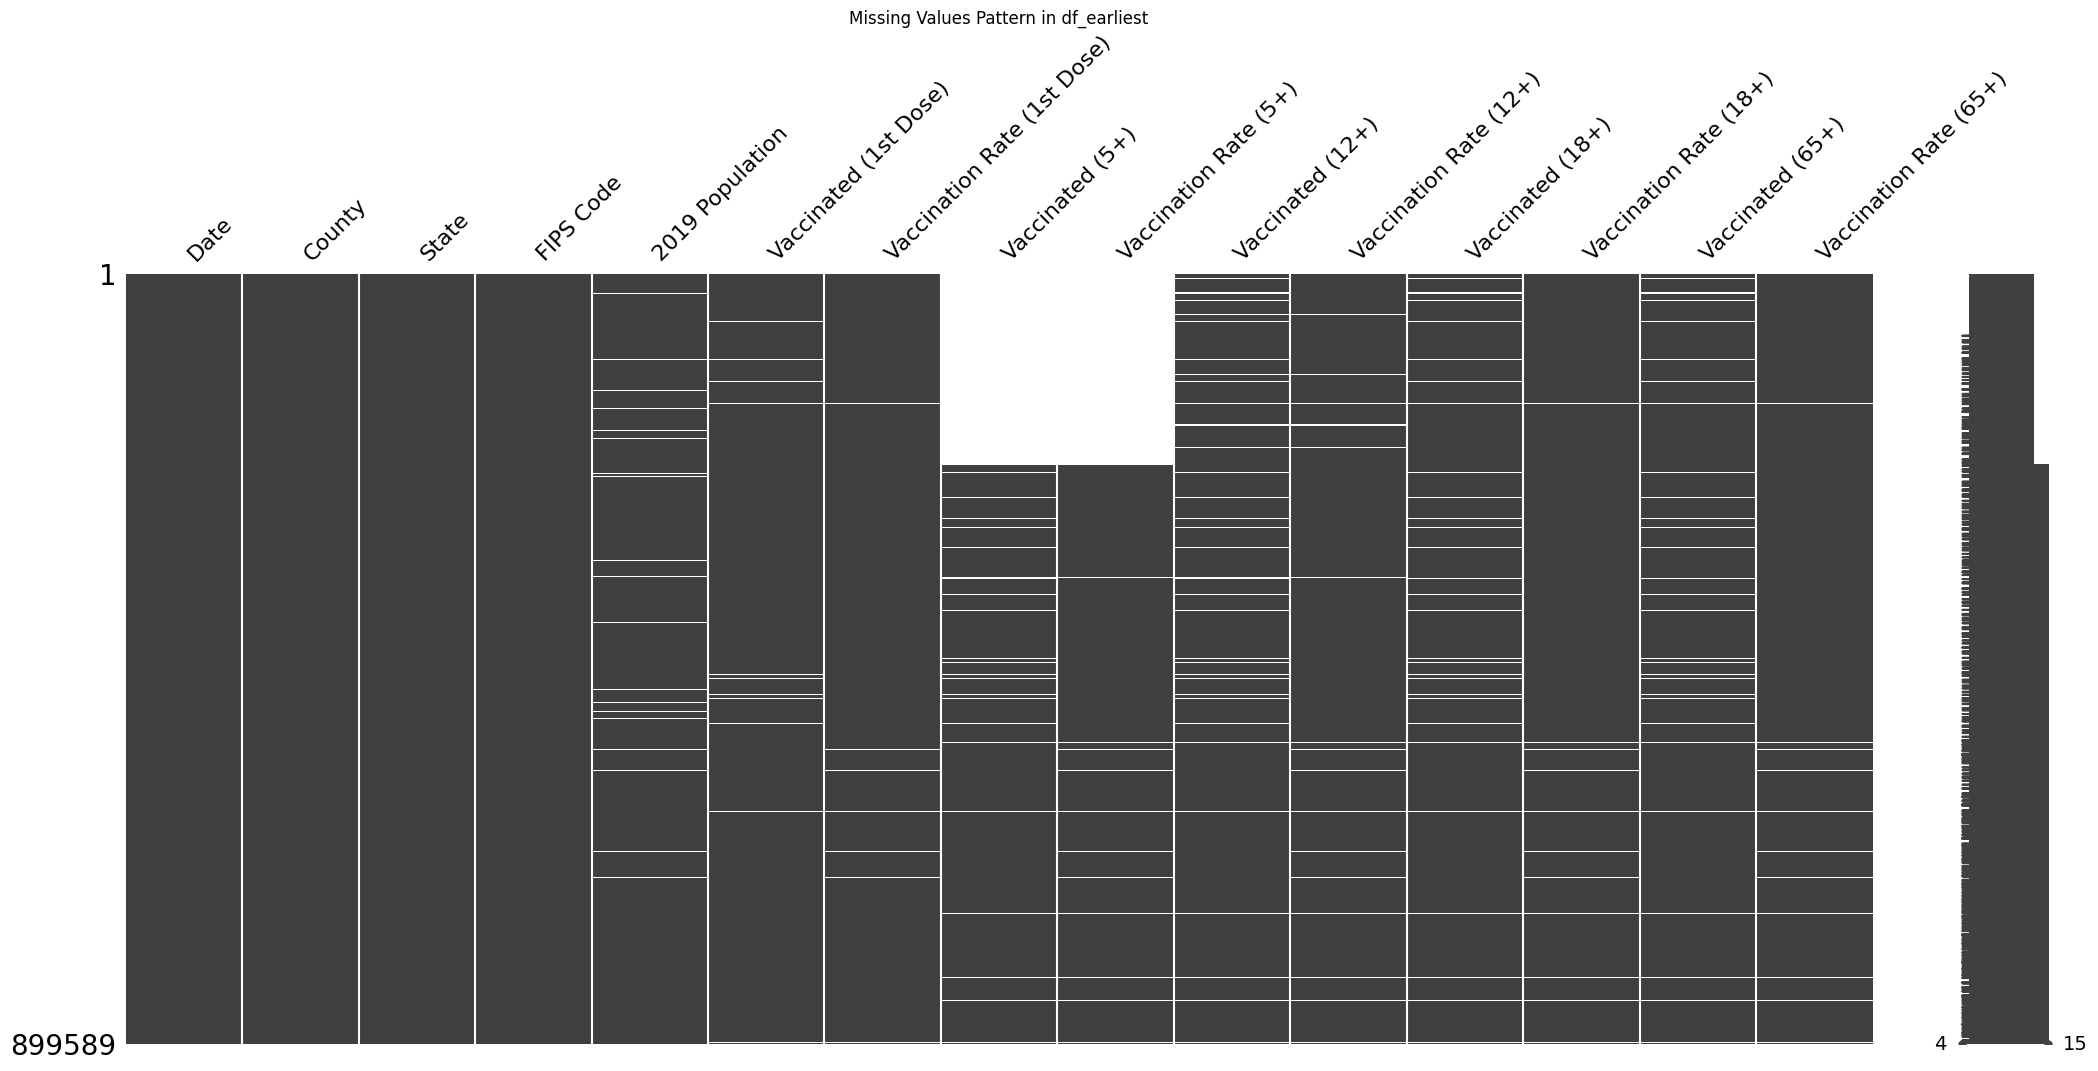


⚠️ Rows where all selected columns are missing:
              Date            County State FIPS Code  2019 Population  \
1002454 2021-10-01    Kalawao County    HI     15005             86.0   
1002457 2021-10-01     Hawaii County    HI     15001         201513.0   
1002569 2021-10-01      Kauai County    HI     15007          72293.0   
1002230 2021-10-01  Nantucket County    MA     25019          11399.0   
1002371 2021-10-01       Maui County    HI     15009         167417.0   
...            ...               ...   ...       ...              ...   
107493  2022-09-28       Maui County    HI     15009         167417.0   
107509  2022-09-28  Hitchcock County    NE     31087           2762.0   
107209  2022-09-28    Unknown County    HI       UNK              NaN   
107144  2022-09-28      Dodge County    NE     31053          36565.0   
107237  2022-09-28   Antelope County    NE     31003           6298.0   

         Vaccinated (1st Dose)  Vaccination Rate (1st Dose)  Vaccinated (5

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

columns_to_fill = [
    "Vaccinated (1st Dose)", "Vaccination Rate (1st Dose)",
    "Vaccinated (12+)", "Vaccination Rate (12+)",
    "Vaccinated (18+)", "Vaccination Rate (18+)",
    "Vaccinated (65+)", "Vaccination Rate (65+)"
]
# 1️⃣ **Check the number of missing values in each column**
print("🔍 Overview of missing values:")
print(df_earliest.isnull().sum())

# 2️⃣ **Check the number of missing values at the County & State level**
missing_by_county = df_earliest.groupby(["County", "State"])[columns_to_fill].apply(lambda x: x.isnull().sum())
print("\n🔍 Number of missing values for each County & State:")
print(missing_by_county)

# 3️⃣ **Visualize missing value patterns**
plt.figure(figsize=(12,6))
msno.matrix(df_earliest)
plt.title("Missing Values Pattern in df_earliest")
plt.show()

# 4️⃣ **Find rows where all selected columns are completely missing**
fully_missing_rows = df_earliest[df_earliest[columns_to_fill].isnull().all(axis=1)]
print("\n⚠️ Rows where all selected columns are missing:")
print(fully_missing_rows)

# 5️⃣ **Check which dates have the most missing values**
missing_by_date = df_earliest.groupby("Date")[columns_to_fill].apply(lambda x: x.isnull().sum())
print("\n📅 Missing values by date:")
print(missing_by_date.sort_values(by=columns_to_fill, ascending=False).head(10))

# 6️⃣ **Identify Counties & States with a high percentage of missing values**
missing_ratio = missing_by_county.div(df_earliest.groupby(["County", "State"]).size(), axis=0)
high_missing_ratio = missing_ratio[missing_ratio.mean(axis=1) > 0.5]  # Example: Areas with more than 50% missing values
print("\n⚠️ Counties & States with more than 50% missing values:")
print(high_missing_ratio)


In [ ]:
columns_to_fill = df_earliest.select_dtypes(include=['number']).columns.tolist()

# Variables to track missing value imputation
total_missing_before = 0
total_filled_by_ffill_bfill = 0
total_filled_by_interpolate = 0
total_filled_by_rolling_mean = 0
total_filled_by_mean_or_zero = 0

# Define the missing value imputation function (applied to each County & State)
def fill_missing_values(group):
    global total_missing_before, total_filled_by_ffill_bfill, total_filled_by_interpolate
    global total_filled_by_rolling_mean, total_filled_by_mean_or_zero

    # Sort by Date to ensure proper imputation order
    group = group.sort_values(by="Date")

    for col in columns_to_fill:
        # Record the original number of missing values
        missing_before = group[col].isnull().sum()
        total_missing_before += missing_before

        # First, apply forward fill (`ffill()`) + backward fill (`bfill()`)
        group[col] = group[col].ffill().bfill()

        # Record the number of missing values filled by `ffill()` + `bfill()`
        missing_after_ffill_bfill = group[col].isnull().sum()
        filled_by_ffill_bfill = missing_before - missing_after_ffill_bfill
        total_filled_by_ffill_bfill += filled_by_ffill_bfill

        # Apply linear interpolation to further fill missing values
        group[col] = group[col].interpolate(method='linear', limit_direction="both")

        # Record the number of missing values filled by `interpolate()`
        missing_after_interpolate = group[col].isnull().sum()
        filled_by_interpolate = missing_after_ffill_bfill - missing_after_interpolate
        total_filled_by_interpolate += filled_by_interpolate

        # If missing values still exist, use rolling mean (`rolling().mean()`) for smoothing
        if missing_after_interpolate > 0:
            group[col] = group[col].fillna(group[col].rolling(window=5, min_periods=1).mean())

        # Record the number of missing values filled by `rolling().mean()`
        missing_after_rolling_mean = group[col].isnull().sum()
        filled_by_rolling_mean = missing_after_interpolate - missing_after_rolling_mean
        total_filled_by_rolling_mean += filled_by_rolling_mean

        # If missing values still exist, apply `mean()` or fill with `0`
        if missing_after_rolling_mean > 0:
            print(f"⚠️ {group['County'].iloc[0]}, {group['State'].iloc[0]} - {col} still has {missing_after_rolling_mean} NaN values, applying forced imputation.")

            # Method 1: Fill with the `mean()` of the County & State
            mean_value = group[col].mean()
            if pd.notnull(mean_value):  # Ensure mean value is valid
                group[col].fillna(mean_value, inplace=True)

            # Method 2: If NaN values still exist, fill with 0
            missing_after_mean = group[col].isnull().sum()
            if missing_after_mean > 0:
                group[col].fillna(0, inplace=True)

            # Record the number of missing values filled by forced imputation
            filled_by_mean_or_zero = missing_after_rolling_mean - group[col].isnull().sum()
            total_filled_by_mean_or_zero += filled_by_mean_or_zero

    return group

# Apply missing value imputation grouped by 'County' and 'State'
df_earliest = df_earliest.groupby(["County", "State"]).apply(fill_missing_values)

# Reset the index after group operation
df_earliest.reset_index(drop=True, inplace=True)

# Calculate the proportion of forced imputation
total_filled = (total_filled_by_ffill_bfill + total_filled_by_interpolate +
                total_filled_by_rolling_mean + total_filled_by_mean_or_zero)

forced_fill_ratio = total_filled_by_mean_or_zero / total_filled if total_filled > 0 else 0

# Display the final missing value check
print("\n🔍 Final Missing Value Check:")
print(df_earliest[columns_to_fill].isnull().sum())  # Ensure all NaN values are handled

# Display missing value imputation statistics
print("\n📊 Missing Value Imputation Statistics:")
print(f"🔹 Total missing values before imputation: {total_missing_before}")
print(f"🔹 Missing values filled by `ffill()` + `bfill()`: {total_filled_by_ffill_bfill}")
print(f"🔹 Missing values filled by `interpolate()`: {total_filled_by_interpolate}")
print(f"🔹 Missing values filled by `rolling().mean()`: {total_filled_by_rolling_mean}")
print(f"🔹 Forced imputation (`mean()` or `0`): {total_filled_by_mean_or_zero}")
print(f"⚠️ Forced imputation ratio: {forced_fill_ratio:.2%}")


⚠️ Alpine County, CA - Bivalent_Booster_5Plus still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_5Plus_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_12Plus still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_12Plus_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_18Plus still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_18Plus_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_65Plus still has 598 NaN values, applying forced imputation.
⚠️ Alpine County, CA - Bivalent_Booster_65Plus_Pop_Pct still has 598 NaN values, applying forced imputation.


<ipython-input-15-78746c217d62>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  group[col].fillna(0, inplace=True)


⚠️ Barnstable County, MA - Administered_Dose1_Recip still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Administered_Dose1_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Series_Complete_Yes still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Series_Complete_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Booster_Doses still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Booster_Doses_Vax_Pct still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Bivalent_Booster_5Plus still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Bivalent_Booster_5Plus_Pop_Pct still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Administered_Dose1_Recip_12Plus still has 598 NaN values, applying forced imputation.
⚠️ Barnstable County, MA - Administered_Dose1_Recip_1

<ipython-input-15-78746c217d62>:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_earliest = df_earliest.groupby(["County", "State"]).apply(fill_missing_values)



🔍 Final Missing Value Check:
2019 Population                           0
Administered_Dose1_Recip                  0
Administered_Dose1_Pop_Pct                0
Series_Complete_Yes                       0
Series_Complete_Pop_Pct                   0
Booster_Doses                             0
Booster_Doses_Vax_Pct                     0
Bivalent_Booster_5Plus                    0
Bivalent_Booster_5Plus_Pop_Pct            0
Administered_Dose1_Recip_12Plus           0
Administered_Dose1_Recip_12PlusPop_Pct    0
Administered_Dose1_Recip_18Plus           0
Administered_Dose1_Recip_18PlusPop_Pct    0
Administered_Dose1_Recip_65Plus           0
Administered_Dose1_Recip_65PlusPop_Pct    0
Series_Complete_12Plus                    0
Series_Complete_12PlusPop_Pct             0
Series_Complete_18Plus                    0
Series_Complete_18PlusPop_Pct             0
Series_Complete_65Plus                    0
Series_Complete_65PlusPop_Pct             0
Booster_Doses_12Plus                      0
Bo

In [ ]:
# # Calculate the number of vaccinated individuals in each age group
# df_earliest["Vaccinated (0-12)"] = df_earliest["Vaccinated (1st Dose)"] - df_earliest["Vaccinated (12+)"]
# df_earliest["Vaccinated (12-17)"] = df_earliest["Vaccinated (12+)"] - df_earliest["Vaccinated (18+)"]
# df_earliest["Vaccinated (18-64)"] = df_earliest["Vaccinated (18+)"] - df_earliest["Vaccinated (65+)"]

# # Ensure values are not negative
# df_earliest[["Vaccinated (0-12)", "Vaccinated (12-17)", "Vaccinated (18-64)"]] = df_earliest[["Vaccinated (0-12)", "Vaccinated (12-17)", "Vaccinated (18-64)"]].clip(lower=0)

# # Check the results
# print(df_earliest[["Vaccinated (0-12)", "Vaccinated (12-17)", "Vaccinated (18-64)", "Vaccinated (65+)"]].head())


In [ ]:
df_earliest.columns

Index(['Date', 'County', 'State', 'FIPS Code', '2019 Population',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Series_Complete_Yes', 'Series_Complete_Pop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Bivalent_Booster_5Plus',
       'Bivalent_Booster_5Plus_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses_12Plus',
       'Booster_Doses_12Plus_Vax_Pct', 'Booster_Doses_18Plus',
       'Booster_Doses_18Plus_Vax_Pct', 'Booster_Doses_65Plus',
       'Booster_Doses_65Plus_Vax_Pct', 'Bivalent_Booster_12Plus',
       'Bivalent

In [ ]:
df_earliest = df_earliest.drop(columns=['Bivalent_Booster_5Plus_Pop_Pct', 'Bivalent_Booster_5Plus'])

In [ ]:
df_earliest

,Date,County,State,FIPS Code,2019 Population,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Booster_Doses,...,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
1001365,2021-10-22,Lee County,SC,45061,16828.0,7038.0,41.8,6188.0,36.8,1761.0,...,1760.0,28.4,1103.0,48.2,640.0,4.3,631.0,4.7,422.0,12.7
1001366,2021-10-23,Lee County,SC,45061,16828.0,7046.0,41.9,6192.0,36.8,1761.0,...,1760.0,28.4,1103.0,48.2,640.0,4.3,631.0,4.7,422.0,12.7
1001367,2021-10-24,Lee County,SC,45061,16828.0,7056.0,41.9,6194.0,36.8,1761.0,...,1760.0,28.4,1103.0,48.2,640.0,4.3,631.0,4.7,422.0,12.7
1001368,2021-10-25,Lee County,SC,45061,16828.0,7070.0,42.0,6195.0,36.8,1761.0,...,1760.0,28.4,1103.0,48.2,640.0,4.3,631.0,4.7,422.0,12.7
1001369,2021-10-26,Lee County,SC,45061,16828.0,7074.0,42.0,6198.0,36.8,1761.0,...,1760.0,28.4,1103.0,48.2,640.0,4.3,631.0,4.7,422.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962695,2023-04-12,Ziebach County,SD,46137,2756.0,1244.0,45.1,1078.0,39.1,659.0,...,543.0,65.1,101.0,68.2,195.0,8.4,170.0,8.5,45.0,17.0
1962696,2023-04-19,Ziebach County,SD,46137,2756.0,1246.0,45.2,1078.0,39.1,660.0,...,543.0,65.1,101.0,68.2,195.0,8.4,170.0,8.5,45.0,17.0
1962697,2023-04-26,Ziebach County,SD,46137,2756.0,1246.0,45.2,1078.0,39.1,660.0,...,543.0,65.1,101.0,68.2,195.0,8.4,170.0,8.5,45.0,17.0
1962698,2023-05-03,Ziebach County,SD,46137,2756.0,1246.0,45.2,1078.0,39.1,661.0,...,543.0,65.1,101.0,68.2,196.0,8.4,170.0,8.5,45.0,17.0


In [ ]:
df_earliest.isna().sum()

,0
Date,0
County,0
State,0
FIPS Code,0
2019 Population,0
Administered_Dose1_Recip,0
Administered_Dose1_Pop_Pct,0
Series_Complete_Yes,0
Series_Complete_Pop_Pct,0
Booster_Doses,0


In [ ]:
# 1️⃣ Define constant columns (id_vars), keeping `County`
id_vars = ["Date", "State", "County", "FIPS Code", "2019 Population"]

# 2️⃣ Define columns to be transformed (Numerical columns: Vaccination count & rate)
value_vars = [
    "Administered_Dose1_Recip", "Series_Complete_Yes", "Booster_Doses",
    "Administered_Dose1_Recip_12Plus", "Series_Complete_12Plus", "Booster_Doses_12Plus", "Bivalent_Booster_12Plus",
    "Administered_Dose1_Recip_18Plus", "Series_Complete_18Plus", "Booster_Doses_18Plus", "Bivalent_Booster_18Plus",
    "Administered_Dose1_Recip_65Plus", "Series_Complete_65Plus", "Booster_Doses_65Plus", "Bivalent_Booster_65Plus"
]

rate_vars = [
    "Administered_Dose1_Pop_Pct", "Series_Complete_Pop_Pct", "Booster_Doses_Vax_Pct",
    "Administered_Dose1_Recip_12PlusPop_Pct", "Series_Complete_12PlusPop_Pct", "Booster_Doses_12Plus_Vax_Pct", "Bivalent_Booster_12Plus_Pop_Pct",
    "Administered_Dose1_Recip_18PlusPop_Pct", "Series_Complete_18PlusPop_Pct", "Booster_Doses_18Plus_Vax_Pct", "Bivalent_Booster_18Plus_Pop_Pct",
    "Administered_Dose1_Recip_65PlusPop_Pct", "Series_Complete_65PlusPop_Pct", "Booster_Doses_65Plus_Vax_Pct", "Bivalent_Booster_65Plus_Pop_Pct"
]

# Reclassify `Vaccine Stage`
def classify_vaccine_stage(stage):
    """Determine the vaccination stage based on column names"""
    if "Administered_Dose1_Recip" in stage:
        return "1st Dose"
    elif "Series_Complete" in stage:
        return "Fully Vaccinated"
    elif "Booster_Doses" in stage:
        return "Booster 1st Dose"
    elif "Bivalent_Booster" in stage:
        return "Bivalent Booster"
    else:
        return "Unknown"  # Handle unexpected columns

def classify_vaccine_stage_rate(stage):
    """Determine the vaccination rate stage (for rate variables)"""
    if "Administered_Dose1_Pop_Pct" in stage:
        return "1st Dose"
    elif "Series_Complete_Pop_Pct" in stage:
        return "Fully Vaccinated"
    elif "Booster_Doses_Vax_Pct" in stage:
        return "Booster 1st Dose"
    elif "Bivalent_Booster_5Plus_Pop_Pct" in stage:
        return "Bivalent Booster"
    else:
        return "Unknown"

# Parse `Age Group`
def classify_age_group(stage):
    """Determine the age group based on column names"""
    if "12Plus" in stage:
        return "12+"  # 12 years and above
    elif "18Plus" in stage:
        return "18+"  # 18 years and above
    elif "65Plus" in stage:
        return "65+"  # 65 years and above
    else:
        return "All"  # If no specific age is mentioned, assign "All"

# 3️⃣ Perform data transformation
def process_batch(df_batch):
    """Melt and merge vaccination data in batches"""
    # Transform vaccination count data
    df_vaccinated = df_batch.melt(id_vars=id_vars, value_vars=value_vars, var_name="Vaccine Stage", value_name="Vaccinated")
    df_vaccinated["Age Group"] = df_vaccinated["Vaccine Stage"].apply(classify_age_group)
    df_vaccinated["Vaccine Stage"] = df_vaccinated["Vaccine Stage"].apply(classify_vaccine_stage)

    # Transform vaccination rate data
    df_rate = df_batch.melt(id_vars=id_vars, value_vars=rate_vars, var_name="Vaccine Stage", value_name="Vaccination Rate")
    df_rate["Age Group"] = df_rate["Vaccine Stage"].apply(classify_age_group)
    df_rate["Vaccine Stage"] = df_rate["Vaccine Stage"].apply(classify_vaccine_stage_rate)  # Use new function for renaming

    # Merge vaccination count and rate data
    df_merged = pd.merge(df_vaccinated, df_rate, on=id_vars + ["Vaccine Stage", "Age Group"], how="left")

    return df_merged

# 4️⃣ Process data in batches (e.g., process 100,000 rows at a time)
batch_size = 100000
df_batches = [process_batch(df_earliest[i:i + batch_size]) for i in range(0, len(df_earliest), batch_size)]

# 5️⃣ Concatenate all processed batches
df_tidy = pd.concat(df_batches, ignore_index=True)


In [ ]:
df_tidy.isna().sum()

,0
Date,0
State,0
County,0
FIPS Code,0
2019 Population,0
Vaccine Stage,0
Vaccinated,0
Age Group,0
Vaccination Rate,11536020


In [ ]:
# 6️⃣ Aggregate at the `State` level (removing `County`)
df_state_level = df_tidy.groupby(["Date", "State", "Vaccine Stage", "Age Group"], as_index=False).agg({
    "Vaccinated": "sum",
    "Vaccination Rate": "mean"  # Compute the average vaccination rate
})

# 7️⃣ Check the results
print("State-Level Aggregation:")
print(df_state_level.head())


State-Level Aggregation:
        Date State     Vaccine Stage Age Group  Vaccinated  Vaccination Rate
0 2020-12-13    AK          1st Dose       12+         0.0               NaN
1 2020-12-13    AK          1st Dose       18+         0.0               NaN
2 2020-12-13    AK          1st Dose       65+         0.0               NaN
3 2020-12-13    AK          1st Dose       All         0.0               0.0
4 2020-12-13    AK  Bivalent Booster       12+     11926.0               NaN


In [ ]:
df_state_level

,Date,State,Vaccine Stage,Age Group,Vaccinated,Vaccination Rate
0,2020-12-13,AK,1st Dose,12+,0.0,NaN
1,2020-12-13,AK,1st Dose,18+,0.0,NaN
2,2020-12-13,AK,1st Dose,65+,0.0,NaN
3,2020-12-13,AK,1st Dose,All,0.0,0.000000
4,2020-12-13,AK,Bivalent Booster,12+,11926.0,NaN
...,...,...,...,...,...,...
533005,2023-05-10,WY,Booster 1st Dose,All,75683.0,48.192308
533006,2023-05-10,WY,Fully Vaccinated,12+,153446.0,NaN
533007,2023-05-10,WY,Fully Vaccinated,18+,145269.0,NaN
533008,2023-05-10,WY,Fully Vaccinated,65+,45680.0,NaN


In [ ]:
df_state_level.groupby(['State', 'Vaccine Stage', 'Age Group']).max('Vaccinated')

Vaccinated  Vaccination Rate
State Vaccine Stage    Age Group                              
AK    1st Dose         12+          111176.0               NaN
                       18+          102704.0               NaN
                       65+           22320.0               NaN
                       All          117140.0         64.657143
      Bivalent Booster 12+           19647.0               NaN
...                                      ...               ...
WY    Booster 1st Dose All           75683.0         48.192308
      Fully Vaccinated 12+          153446.0               NaN
                       18+          145269.0               NaN
                       65+           45680.0               NaN
                       All          157627.0         45.969231

[900 rows x 2 columns]

In [ ]:
# 1️⃣ Create a dictionary mapping state abbreviations to full names
state_abbr_to_full = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# 2️⃣ Add `State Full Name` column to `df_state_level`
df_state_level["State Full Name"] = df_state_level["State"].map(state_abbr_to_full)

# 3️⃣ Ensure there are no `NaN` values (if Looker Studio requires complete data)
df_state_level["State Full Name"].fillna("Unknown", inplace=True)

# 4️⃣ Check the results
print(df_state_level[["State", "State Full Name"]].drop_duplicates().head())


   State State Full Name
0     AK          Alaska
15    AL         Alabama
30    AR        Arkansas
45    AZ         Arizona
60    CA      California


<ipython-input-51-f8771628606c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_state_level["State Full Name"].fillna("Unknown", inplace=True)


In [ ]:
from google.colab import auth
import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe
from googleapiclient.discovery import build

# Authenticate Google Colab user
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Initialize Google Drive API
drive_service = build('drive', 'v3', credentials=creds)

# Define the file name
file_name = "COVID Vaccination_state_level"

# Search for existing files with the same name in Google Drive
query = f"name='{file_name}' and mimeType='application/vnd.google-apps.spreadsheet'"
response = drive_service.files().list(q=query, fields="files(id, name)").execute()
files = response.get('files', [])

# If a file with the same name exists, delete it
if files:
    for file in files:
        file_id = file['id']
        drive_service.files().delete(fileId=file_id).execute()
        print(f"🗑 Deleted old file: {file['name']} (ID: {file_id})")

# Create a new Google Sheets file
spreadsheet = gc.create(file_name)

# Share with your account (optional)
# spreadsheet.share('your_email@gmail.com', perm_type='user', role='writer')

# Get the first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Ensure df_latest exists before uploading
if 'df_state_level' in locals():
    set_with_dataframe(worksheet, df_state_level)
    print("✅ Data uploaded successfully!")
else:
    print("❌ Error: `df_state_level` does not exist.")


🗑 Deleted old file: COVID Vaccination_state_level (ID: 142_6gBoqPSXYZBlZoEWGy4VDJpEWtErHBSEfp3HgILs)
✅ Data uploaded successfully!


In [ ]:
# from google.colab import auth
# import gspread
# from google.auth import default
# from gspread_dataframe import set_with_dataframe
# from googleapiclient.discovery import build
# import pandas as pd
# import numpy as np

# # Authenticate Google Colab user
# auth.authenticate_user()
# creds, _ = default()
# gc = gspread.authorize(creds)

# # Initialize Google Drive API
# drive_service = build('drive', 'v3', credentials=creds)

# # Define the file name
# file_name = "COVID Vaccination Data_Dose1_2021_2022"

# # Search for existing files with the same name in Google Drive
# query = f"name='{file_name}' and mimeType='application/vnd.google-apps.spreadsheet'"
# response = drive_service.files().list(q=query, fields="files(id, name)").execute()
# files = response.get('files', [])

# # If a file with the same name exists, delete it
# if files:
#     for file in files:
#         file_id = file['id']
#         drive_service.files().delete(fileId=file_id).execute()
#         print(f"🗑 Deleted old file: {file['name']} (ID: {file_id})")

# # Create a new Google Sheets file
# spreadsheet = gc.create(file_name)

# # Get existing worksheets
# worksheets = spreadsheet.worksheets()

# # Get the first worksheet (create one if it doesn’t exist)
# if worksheets:
#     worksheet = worksheets[0]
# else:
#     worksheet = spreadsheet.add_worksheet(title="Sheet1", rows="1000", cols="20")

# # Ensure df_tidy exists before uploading
# if 'df_tidy' in locals() and isinstance(df_tidy, pd.DataFrame):
#     # Split data into smaller chunks (e.g., 10,000 rows per batch)
#     chunk_size = 10000  # Adjust based on performance needs
#     num_chunks = int(np.ceil(len(df_tidy) / chunk_size))

#     print(f"🚀 Uploading {len(df_tidy)} rows in {num_chunks} batches...")

#     for i, chunk in enumerate(np.array_split(df_tidy, num_chunks)):
#         print(f"📤 Uploading batch {i+1}/{num_chunks}...")
#         set_with_dataframe(worksheet, chunk, row=i * chunk_size + 1, col=1, include_index=False)

#     print("✅ Data uploaded successfully in batches!")
# else:
#     print("❌ Error: `df_tidy` does not exist or is not a valid DataFrame.")


🗑 Deleted old file: COVID Vaccination Data_Dose1_2021_2022 (ID: 11XpoWjmT_DxoRqr_VssEEv8HerGUDxh9deyyw1VGVxg)
🚀 Uploading 2698530 rows in 270 batches...


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


📤 Uploading batch 1/270...
📤 Uploading batch 2/270...
📤 Uploading batch 3/270...
📤 Uploading batch 4/270...
📤 Uploading batch 5/270...
📤 Uploading batch 6/270...
📤 Uploading batch 7/270...
📤 Uploading batch 8/270...
📤 Uploading batch 9/270...
📤 Uploading batch 10/270...
📤 Uploading batch 11/270...
📤 Uploading batch 12/270...
📤 Uploading batch 13/270...
📤 Uploading batch 14/270...
📤 Uploading batch 15/270...
📤 Uploading batch 16/270...
📤 Uploading batch 17/270...
📤 Uploading batch 18/270...
📤 Uploading batch 19/270...
📤 Uploading batch 20/270...
📤 Uploading batch 21/270...
📤 Uploading batch 22/270...
📤 Uploading batch 23/270...
📤 Uploading batch 24/270...
📤 Uploading batch 25/270...
📤 Uploading batch 26/270...
📤 Uploading batch 27/270...
📤 Uploading batch 28/270...
📤 Uploading batch 29/270...
📤 Uploading batch 30/270...
📤 Uploading batch 31/270...
📤 Uploading batch 32/270...
📤 Uploading batch 33/270...
📤 Uploading batch 34/270...
📤 Uploading batch 35/270...
📤 Uploading batch 36/270...
📤

KeyboardInterrupt: 